In [2]:
# %%
import gdown
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output
import time
from datetime import datetime
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string as string
from googletrans import Translator


Asegurarnos de estar en carpeta : Proyecto-Grupal---Olist sino la posees creala

In [4]:

#os.chdir("C:/Users/Ricardo/Desktop/Proyecto-Grupal---Olist/")

Revisando el directorio correcto y creando el directorio para el input al ETL. Se maneja el error en caso el directorio exista para no suspender el programa.

In [3]:

print(os.getcwd())
try:
    os.mkdir("ETL")
except FileExistsError as error:
    print("Directorio para ETL ya estaba creado.")

g:\Mi unidad\Programacion\SoyHenry\PF_DS
Directorio para ETL ya estaba creado.


Accesando el link de drive 

In [4]:

url = "https://drive.google.com/drive/folders/14DFvVrsV6zIBH0ARnArBZdUhSXcf6OYh?usp=share_link"

print("conectando con Google drive y leyendo archivos ...")

files = gdown.download_folder(url, quiet=True, use_cookies=False)
files

conectando con Google drive y leyendo archivos ...


['g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_closed_deals_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_customers_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_geolocation_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_marketing_qualified_leads_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_order_items_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_order_payments_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_order_reviews_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_orders_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_products_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\olist_sellers_dataset.csv',
 'g:\\Mi unidad\\Programacion\\SoyHenry\\PF_DS\\Datasets\\product_category_name_translation.cs

Extraemos exclusivamente el nombre diferencial del archivo

In [5]:

nombres=[]
for file in files:
    lista = file.split("Datasets\\") 
    nombre = lista[1].replace("olist_","").replace(".csv","").replace("_dataset","").capitalize()
    nombres.append(nombre)
    
    

Entramos al bucle iterador de revisión de la data. Dentro de la transformación de fechas, el programa revisa si existe algún título de columna que contenga las palabras **date** o **stamp**, en caso de encontrarlas, se efectúa la transformación correspondiente a formato **datetime**.

Asimismo se consideran acumuladores de data en listas para obtener estadistcas del EDA.



********************************
Carga de Closed_deals
********************************


Tamaño del dataset
------------------


El dataset Closed_deals contiene 842 filas y 14 columnas


Muestreo de 10 registros aleatorios
-----------------------------------


                               mql_id                         seller_id  \
306  a7949e3bfe0d90df9ba1700365ac42c9  4018093c0809ddcb1f633ed5cc3f5eb2   
489  dd61b41d5b91a9a09e504f025a87553b  ae45df84722b1d15c5f32b23a095746c   
488  3b3f06f94891410cd5cec559abe7cff8  9cec48faacf156410e6c576bcefdade5   
247  5bee2861956d76fe35e91c33bc4a81b3  dda37071807e404c5bb2a1590c66326f   
160  a4fa73f413400524fef474c93faa5e02  bd4431c1a8dfa744b59e1e2a8bc99b9e   
218  02c1f06978b821b2996ec257932f2947  9b1585752613ec342d03bbab9997ec48   
146  428a96d781ccb96d757bbf82f8242d95  c54679b132454625907c773d273d4126   
365  518f741fa426a51c73533c621e5c8107  d4ffeb15b67e81ff9af2b4252d99fb7e   
807  42d15f0a37b7d0a151bb2ca9cc7e5548  9cf787a239c1aa29dbd76

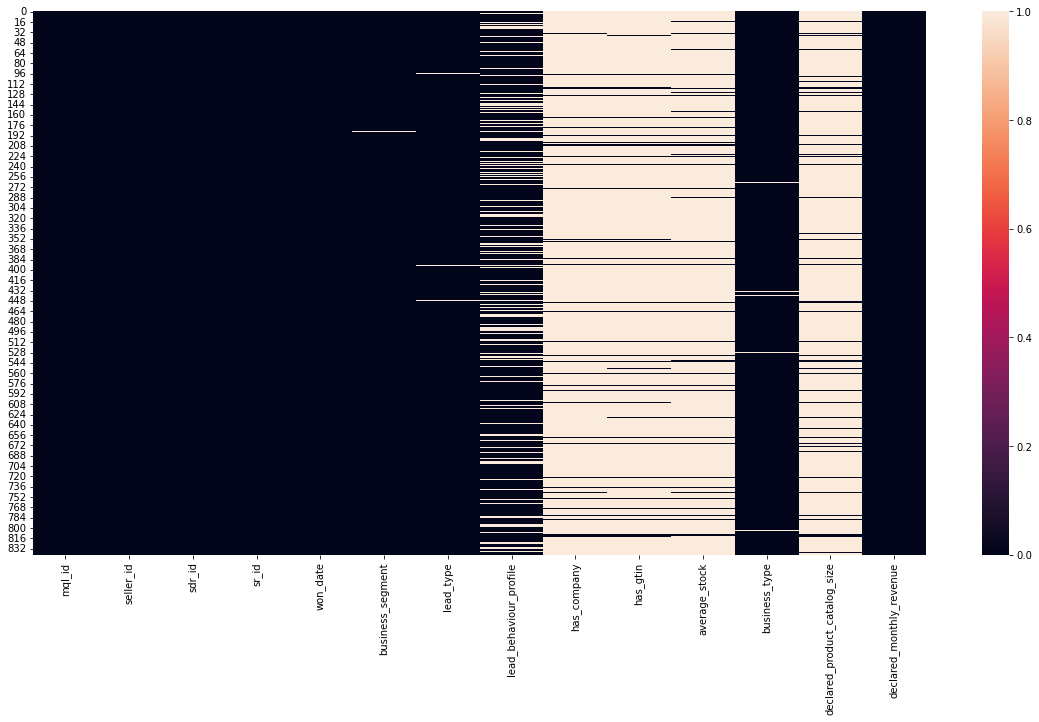

Revisión de algun campo fecha
------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    object        
 4   won_date                       842 non-null    datetime64[ns]
 5   business_segment               841 non-null    object        
 6   lead_type                      836 non-null    object        
 7   lead_behaviour_profile         665 non-null    object        
 8   has_company                    63 non-null     object        
 9   has_gtin                       64 non-null     object        
 10  average_stock          

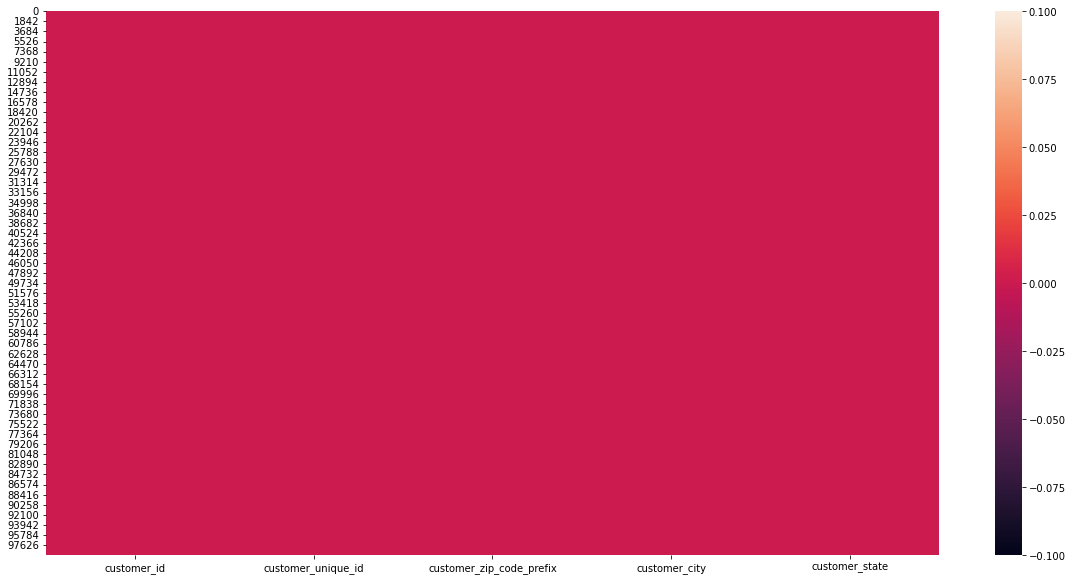

Revisión de algun campo fecha
------------------------------


El archivo Customers no posee campos de tipo Date.


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


********************************
Carga de Geolocation
********************************


Tamaño del dataset
------------------


El dataset Geolocation contiene 1000163 filas y 5 columnas


Muestreo de 10 registros aleatorios
-----------------------------------


        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
278216                        12410       -22.930826       -45.463654   
662635                        39535       -15.403049       -42.307772   
755983                        65070        -2.522475       -44.265304   
549394                        30380       -19.946892       -43.958420   
51118                          3211       -23.600119       -46.555684  

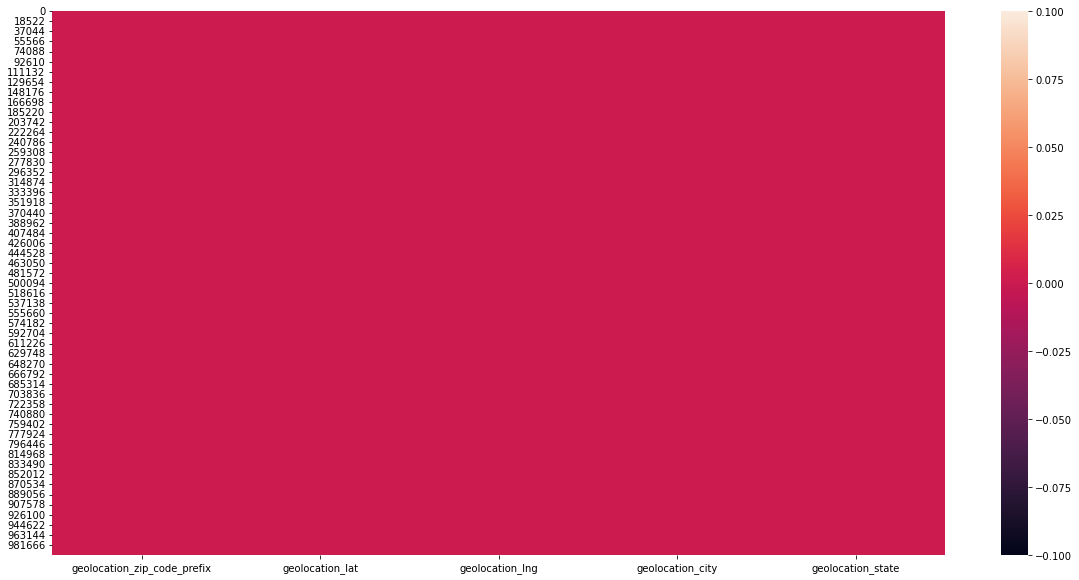

Revisión de algun campo fecha
------------------------------


El archivo Geolocation no posee campos de tipo Date.


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


********************************
Carga de Marketing_qualified_leads
********************************


Tamaño del dataset
------------------


El dataset Marketing_qualified_leads contiene 8000 filas y 4 columnas


Muestreo de 10 registros aleatorios
-----------------------------------


                                mql_id first_contact_date  \
6873  fc68039f8f705edde76c6d8c6cf61ec7         2018-04-11   
5010  6de138653a359bbbc1d392d52fa333e6         2017-07-25   
3854  4dcfeaf97d0aec9f35e384d9c3624b39         2018-01-30   
1073  3f43b741e9c8523c43e3370be32f2c0a         2018-05-18   
4072  d2c2de6e423321db2aed69be2da62c9b         2017-10-17   
6867  b2f24ad52942ea9eadda8ac7b7db4f54     

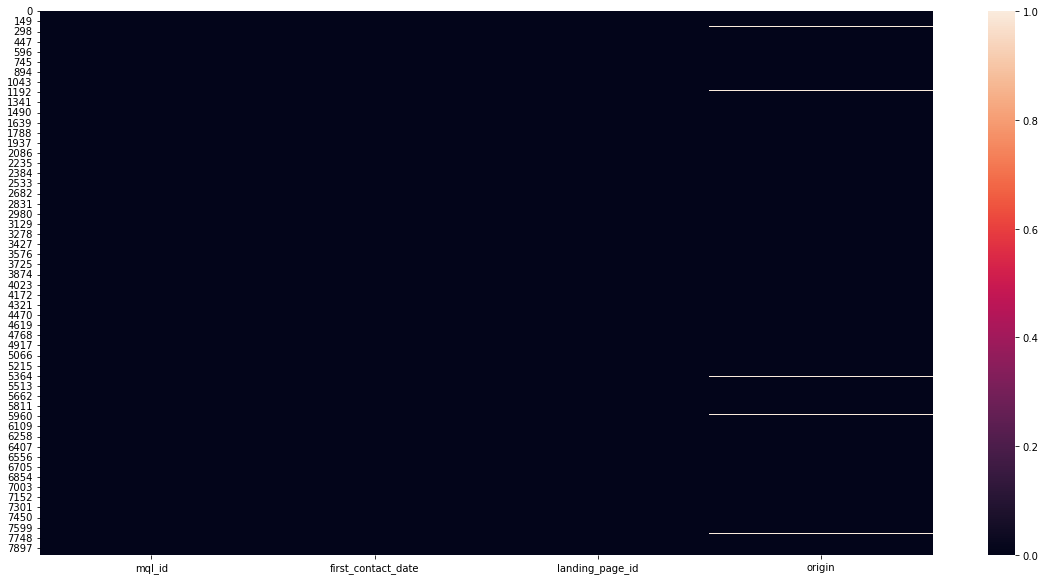

Revisión de algun campo fecha
------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              7940 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


********************************
Carga de Order_items
********************************


Tamaño del dataset
------------------


El dataset Order_items contiene 112650 filas y 7 columnas


Muestreo de 10 registros aleatorios
-----------------------

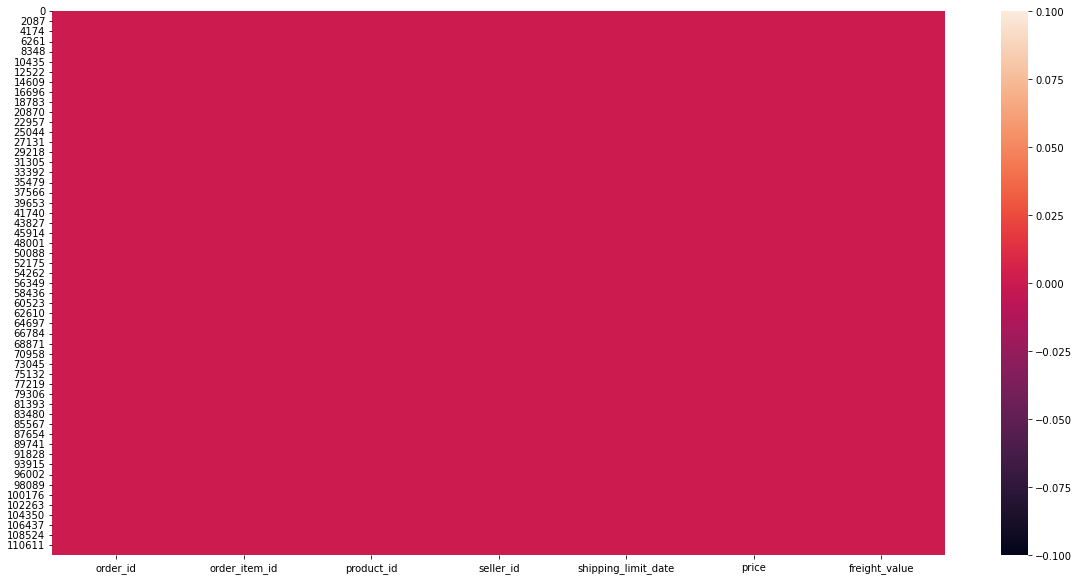

Revisión de algun campo fecha
------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


********************************
Carga

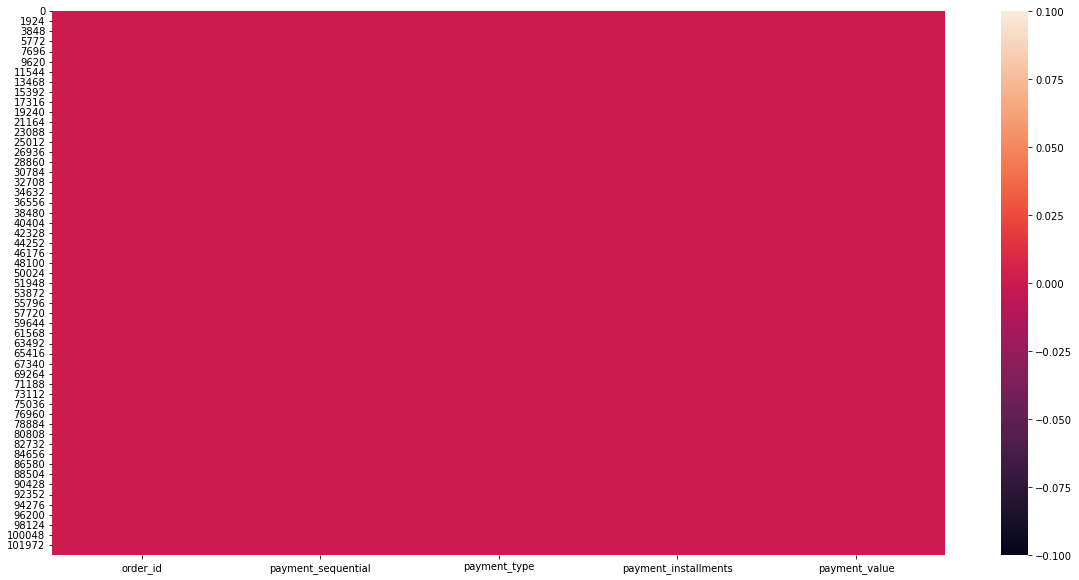

Revisión de algun campo fecha
------------------------------


El archivo Order_payments no posee campos de tipo Date.


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


********************************
Carga de Order_reviews
********************************


Tamaño del dataset
------------------


El dataset Order_reviews contiene 99224 filas y 7 columnas


Muestreo de 10 registros aleatorios
-----------------------------------


                              review_id                          order_id  \
65344  ab37392a7760056d8184f873df6751ce  1d59b360ab8917af7b326a6e8709f2a1   
51969  bad04c99880d3b315ba53095cf69863a  25cacb44fe990ecc6911866d487796f1   
42386  49713c30db803c0288cb3b89a3434103  249907441e345229204263360b34edd7   
68950  578bdbbd5f81bf8812e45e75049d2107  553fee3c21ab4328508c8e467806613e   
96034  c8e20e8dd9f3039d4807722ffc39ecdf  188

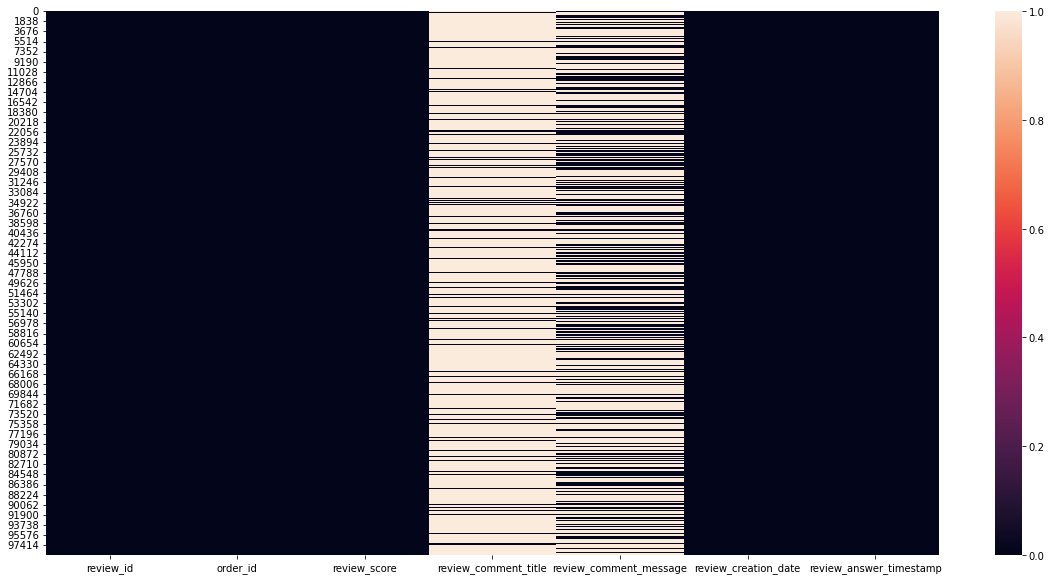

Revisión de algun campo fecha
------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


*************************

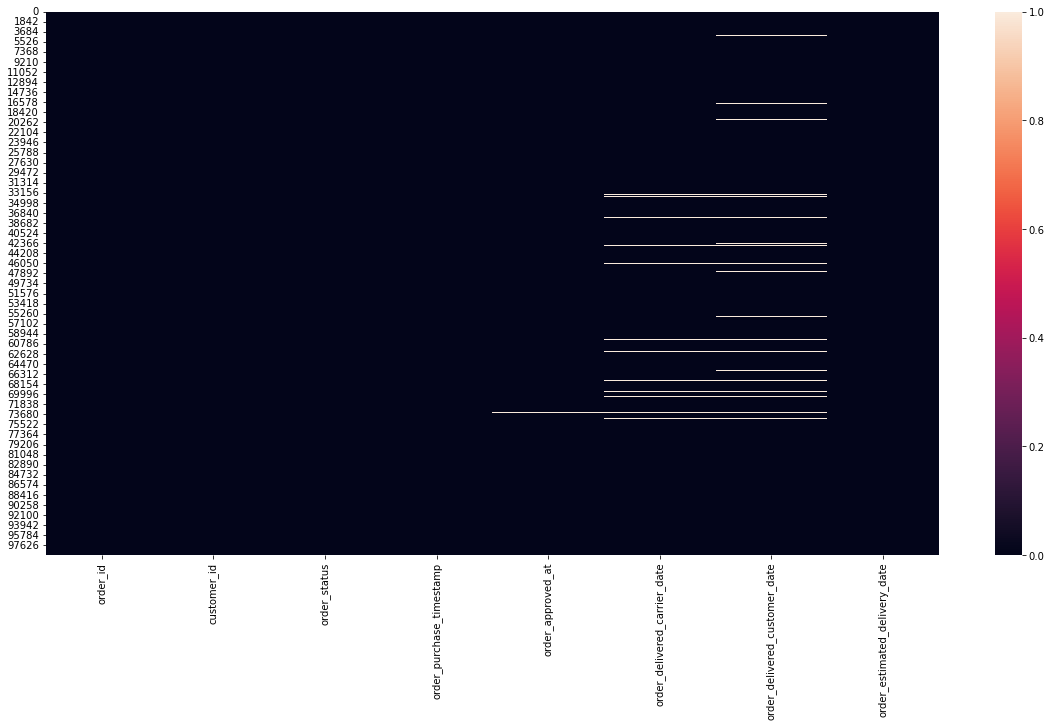

Revisión de algun campo fecha
------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|||||||

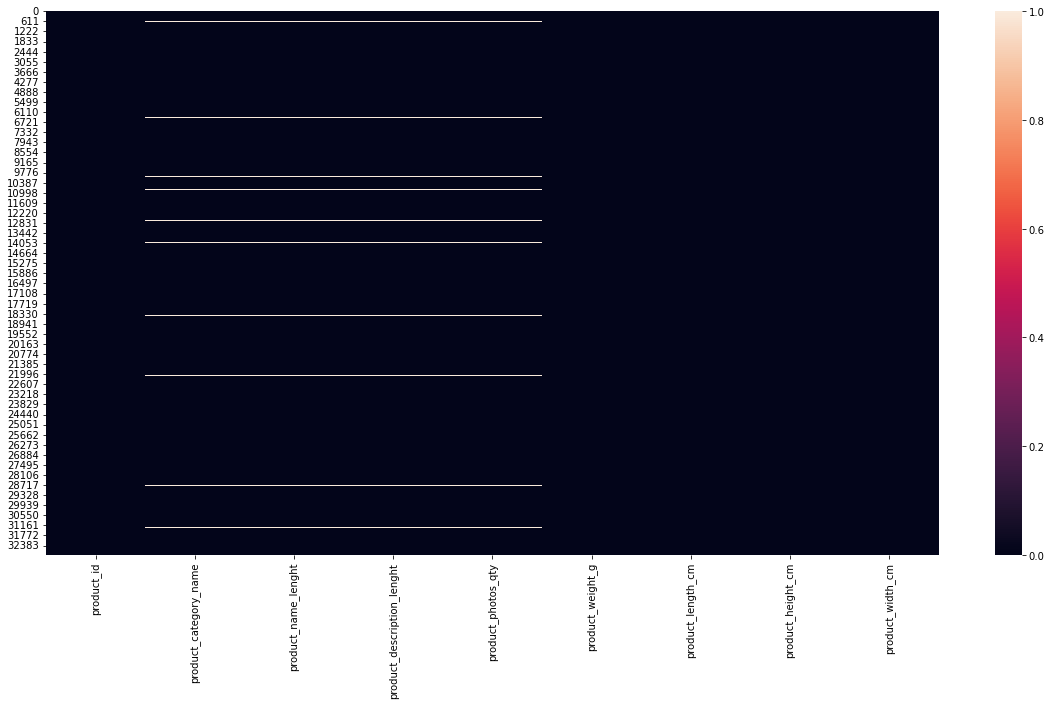

Revisión de algun campo fecha
------------------------------


El archivo Products no posee campos de tipo Date.


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


********************************
Carga de Sellers
********************************


Tamaño del dataset
------------------


El dataset Sellers contiene 3095 filas y 4 columnas


Muestreo de 10 registros aleatorios
-----------------------------------


                             seller_id  seller_zip_code_prefix  \
420   b86a47b3366e3b5424a7b225781f4908                   37900   
1941  39d61be7a92eb77b7da367bd4845bc0e                   13420   
2491  b33e7c55446eabf8fe1a42d037ac7d6d                   14850   
2501  44717f64ec2a457979cf83c429077666                   98780   
1964  8629c241b3622ac12cd4118afdc8d394                   14090   
1214  a2a41aedb70551d4a85aa04dc2fced48              

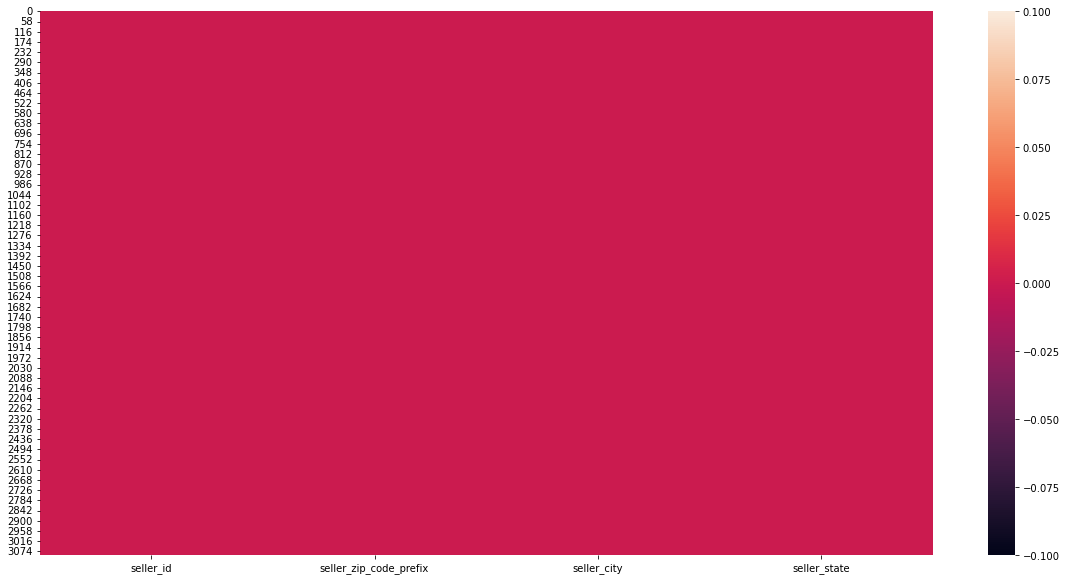

Revisión de algun campo fecha
------------------------------


El archivo Sellers no posee campos de tipo Date.


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


********************************
Carga de Product_category_name_translation
********************************


Tamaño del dataset
------------------


El dataset Product_category_name_translation contiene 71 filas y 2 columnas


Muestreo de 10 registros aleatorios
-----------------------------------


                 product_category_name product_category_name_english
20                               audio                         audio
47                       moveis_quarto             furniture_bedroom
45                           alimentos                          food
19                      consoles_games                consoles_games
42                         moveis_sala         furnitu

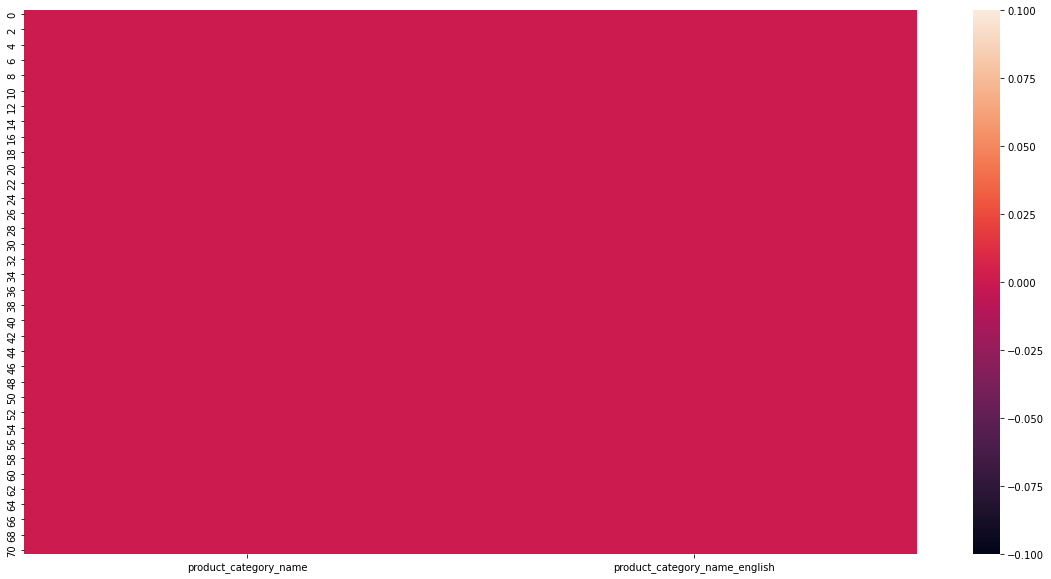

Revisión de algun campo fecha
------------------------------


El archivo Product_category_name_translation no posee campos de tipo Date.


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [8]:
nas=[]
sise=[]
regs=[]

for pos,file in enumerate(files) :
    
    data = pd.read_csv(file)
    
    print("\n")
    print("********************************")
    print(f"Carga de {nombres[pos]}")
    print("********************************")
    print("\n")

    print("Tamaño del dataset")
    print("------------------")
    regs.append(data.shape[0])
    print("\n")
    print(f"El dataset {nombres[pos]} contiene {data.shape[0]} filas y {data.shape[1]} columnas")
    print("\n")

    print("Muestreo de 10 registros aleatorios")
    print("-----------------------------------")
    print("\n")
    print(data.sample(10))
    print("\n")

    print("Columnas, tipo de datos y cantidad de no nulos")
    print("----------------------------------------------")
    print("\n")
    print(data.info())
    print("\n")
    
    print("Valores perdidos en el dataset :")
    print("--------------------------------")
    sise.append(data.size)
    nas.append(data.isna().sum(axis=0).sum())
    print("\n")
    print(data.isna().sum(axis=0))
    print("\n")
    print("+--------------------------------------+")
    print("| M A P A    D E    C A L O R   DE  NAs|")
    print("+--------------------------------------+")
    print("\n")
    plt.figure(figsize=(20,10))
    mapa = sns.heatmap(data.isna())
    plt.show()
    

    print("Revisión de algun campo fecha")
    print("------------------------------")
    print("\n")
    columnas = data.columns
    fecs = [col for col in columnas if "date" in col or "stamp" in col]
    for campo in fecs:
        data[campo]=pd.to_datetime(data[campo],errors="raise")

    if fecs :
        data.info()
    else:
        print(f"El archivo {nombres[pos]} no posee campos de tipo Date.")

   
    data.to_csv("ETL/"+nombres[pos]+".csv")
    print("\n")
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")



+-----------------------------------------+
|          Estadisticas del EDA           |
+-----------------------------------------+


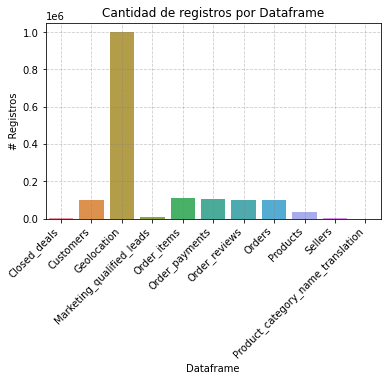

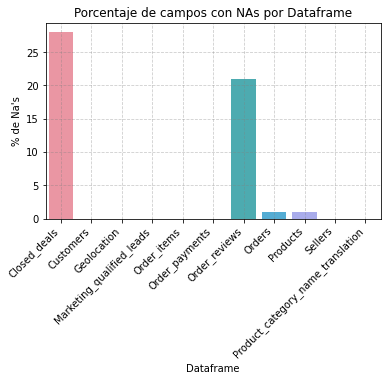

In [9]:

print("+-----------------------------------------+")
print("|          Estadisticas del EDA           |")
print("+-----------------------------------------+")
 
zippi=list(zip(nas,sise))
porc=[round(na/sise,2)*100 for (na,sise) in zippi]

fig,ax = plt.subplots()
sns.barplot(x=nombres,y=regs)
fig.autofmt_xdate(rotation=45)
plt.title("Cantidad de registros por Dataframe")
plt.xlabel("Dataframe")
plt.ylabel("# Registros")
plt.grid(True, color = "grey", linestyle = "--",alpha=0.4)
plt.show()

for pos,file in enumerate(files) :

    
    fig,ax = plt.subplots()
    sns.barplot(x=nombres,y=porc)
    fig.autofmt_xdate(rotation=45)
    plt.title("Porcentaje de campos con NAs")
    plt.xlabel("Dataframe")
    plt.ylabel("% de Na's")
    plt.grid(True, color = "grey", linestyle = "--",alpha=0.4)
    plt.show()

